In [ ]:
! pip install yfinance pandas numpy matplotlib seaborn scikit-learn
! pip install pyportfolioopt
! pip install backtrader  

In [5]:
import yfinance as yf
import pandas as pd
import datetime

# NIFTY 50 Tickers
tickers = nifty50_tickers = [
    "RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS", 
    "HINDUNILVR.NS", "ITC.NS", "LT.NS", "KOTAKBANK.NS", "SBIN.NS",
    "HCLTECH.NS", "BHARTIARTL.NS", "ASIANPAINT.NS", "AXISBANK.NS", "SUNPHARMA.NS",
    "WIPRO.NS", "BAJFINANCE.NS", "ULTRACEMCO.NS", "TECHM.NS", "MARUTI.NS",
    "NTPC.NS", "TITAN.NS", "ADANIENT.NS", "GRASIM.NS", "POWERGRID.NS",
    "JSWSTEEL.NS", "INDUSINDBK.NS", "HINDALCO.NS", "CIPLA.NS", "DRREDDY.NS",
    "NESTLEIND.NS", "EICHERMOT.NS", "DIVISLAB.NS", "BRITANNIA.NS", "BAJAJ-AUTO.NS",
    "BAJAJFINSV.NS", "COALINDIA.NS", "HEROMOTOCO.NS", "ONGC.NS", "SBILIFE.NS",
    "BPCL.NS", "TATAMOTORS.NS", "TATASTEEL.NS", "UPL.NS", "SHREECEM.NS",
    "ADANIPORTS.NS", "HDFCLIFE.NS", "APOLLOHOSP.NS", "M&M.NS", "ICICIPRULI.NS"
]


# Define date range
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=730)

# Download data
data = yf.download(tickers, start=start_date, end=end_date)
# Check if 'Adj Close' is in the columns and access it if present, otherwise access 'Close'
data = data['Adj Close'] if 'Adj Close' in data.columns else data['Close']

# Preview
data.head()

[*********************100%***********************]  50 of 50 completed


Ticker,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-18,1848.354858,651.357666,4306.167480,2798.850586,860.913025,4051.374512,1333.655273,5861.195801,752.084900,150.210434,...,25069.082031,986.490967,470.079773,102.141205,2992.907227,961.744873,2552.282227,7516.170898,725.948425,179.982132
2023-04-19,1851.250854,651.209351,4287.955078,2754.827148,870.934692,4105.803711,1329.809692,5893.000000,756.935486,153.440781,...,24568.267578,977.360535,466.501953,102.615837,2953.569336,951.144348,2543.965088,7437.598145,723.294800,176.508698
2023-04-20,1840.316162,658.825195,4315.844238,2788.310059,866.297852,4152.532715,1330.558838,5858.272949,764.508240,154.203476,...,24067.603516,969.751770,473.856262,102.520912,2968.099854,958.555420,2553.816895,7397.916016,719.461853,177.511612
2023-04-21,1800.472168,654.374329,4328.647461,2825.812988,861.760681,4146.709473,1316.375366,5883.240723,757.479919,155.325134,...,23703.083984,971.420776,468.290863,100.764771,3021.682373,936.932068,2542.974854,7281.837891,722.066345,180.055511
2023-04-24,1799.423462,663.968384,4366.115234,2834.637695,879.809570,4169.617188,1318.223145,5879.129395,752.579773,155.773788,...,23686.509766,961.308411,472.266174,101.097015,3035.017822,943.827087,2603.620850,7363.033203,717.299683,184.898743


In [6]:
import numpy as np

# Calculate 3-month (60-day) momentum
momentum = data.pct_change(periods=60)

# Drop missing values from early days
momentum = momentum.dropna()

# Preview
momentum.tail()
# Latest momentum snapshot (for ranking)
latest_momentum = momentum.iloc[-1].sort_values(ascending=False)

# Display top 10 momentum stocks
print("Top 10 Momentum Stocks:")
print(latest_momentum.head(10))


Top 10 Momentum Stocks:
Ticker
BAJFINANCE.NS    0.273096
KOTAKBANK.NS     0.243603
SHREECEM.NS      0.227338
BAJAJFINSV.NS    0.203998
AXISBANK.NS      0.202765
UPL.NS           0.189958
GRASIM.NS        0.165730
HDFCBANK.NS      0.147396
ICICIBANK.NS     0.145375
EICHERMOT.NS     0.134110
Name: 2025-04-17 00:00:00, dtype: float64


C:\Users\m8cg2\AppData\Local\Temp\ipykernel_16228\218407772.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  momentum = data.pct_change(periods=60)


In [7]:
# Step 1: Calculate daily returns
daily_returns = data.pct_change()

# Step 2: Calculate 20-day rolling standard deviation (volatility)
volatility = daily_returns.rolling(window=20).std()

# Drop NaNs
volatility = volatility.dropna()

# Step 3: Get latest volatility snapshot
latest_volatility = volatility.iloc[-1].sort_values()  # lower is better

# Display top 10 least volatile stocks
print("Top 10 Low-Volatility Stocks:")
print(latest_volatility.head(10))


Top 10 Low-Volatility Stocks:
Ticker
ITC.NS           0.007593
HINDUNILVR.NS    0.009184
ASIANPAINT.NS    0.010176
NESTLEIND.NS     0.010621
BRITANNIA.NS     0.012040
MARUTI.NS        0.012106
APOLLOHOSP.NS    0.013626
TCS.NS           0.014218
SHREECEM.NS      0.015132
BHARTIARTL.NS    0.015595
Name: 2025-04-17 00:00:00, dtype: float64


C:\Users\m8cg2\AppData\Local\Temp\ipykernel_16228\3914743370.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = data.pct_change()


In [8]:
pe_ratios = {}

for ticker in nifty50_tickers:
    try:
        stock = yf.Ticker(ticker)
        info = stock.info
        pe_ratios[ticker] = info.get("trailingPE", None)
    except:
        pe_ratios[ticker] = None

# Convert to DataFrame
pe_df = pd.Series(pe_ratios, name='PE_Ratio').dropna().sort_values()
print("Top 10 Value Stocks (Lowest P/E):")
print(pe_df.head(10))


Top 10 Value Stocks (Lowest P/E):
COALINDIA.NS      7.144525
TATAMOTORS.NS     7.206765
ONGC.NS           7.816248
INDUSINDBK.NS     8.546031
SBIN.NS           8.963558
BPCL.NS           9.242612
HINDALCO.NS       9.778009
AXISBANK.NS      13.172885
NTPC.NS          16.988344
DRREDDY.NS       18.080572
Name: PE_Ratio, dtype: float64


In [9]:
# Calculate 20-day average volume
volume_data = yf.download(nifty50_tickers, start=start_date, end=end_date)['Volume']
avg_volume = volume_data.rolling(window=20).mean().iloc[-1].sort_values(ascending=False)

print("Top 10 Most Liquid Stocks:")
print(avg_volume.head(10))


[*********************100%***********************]  50 of 50 completed

Top 10 Most Liquid Stocks:
Ticker
TATASTEEL.NS     44690839.20
POWERGRID.NS     17318925.35
BPCL.NS          17051154.10
NTPC.NS          16942357.95
TATAMOTORS.NS    16334964.20
ONGC.NS          15577941.55
ITC.NS           14515218.40
RELIANCE.NS      14109472.95
ICICIBANK.NS     13849163.50
HDFCBANK.NS      12975489.10
Name: 2025-04-16 00:00:00, dtype: float64


In [11]:
import pandas as pd
import numpy as np

# Assuming we have the following DataFrames:
# momentum_df, volatility_df, pe_df, avg_volume_df

# Assign the calculated data to the expected DataFrame names
momentum_df = momentum.iloc[-1].sort_values(ascending=False).to_frame(name='Momentum')  # Convert momentum to DataFrame
volatility_df = latest_volatility.to_frame(name='Volatility') # Convert latest_volatility to DataFrame
# pe_df is already defined in the previous cell
avg_volume_df = avg_volume.to_frame(name='Liquidity')  # Convert avg_volume to DataFrame


# Merge all factors into one DataFrame
df = momentum_df.join(volatility_df).join(pe_df).join(avg_volume_df)

# Normalize the columns:
df['Momentum_norm'] = df['Momentum'] / df['Momentum'].max()  # Normalize momentum by max value
df['Volatility_norm'] = 1 - (df['Volatility'] / df['Volatility'].max())  # Lower is better
df['PE_norm'] = 1 - (df['PE_Ratio'] / df['PE_Ratio'].max())  # Lower P/E is better # Use 'PE_Ratio' instead of 'P/E'
df['Liquidity_norm'] = df['Liquidity'] / df['Liquidity'].max()  # Higher volume is better

# Combine into one score
df['Total_Score'] = (df['Momentum_norm'] + df['Volatility_norm'] + df['PE_norm'] + df['Liquidity_norm']) / 4

# Rank stocks based on total score (higher score is better)
df['Rank'] = df['Total_Score'].rank(ascending=False)

# Display top 10 ranked stocks
print(df[['Total_Score', 'Rank']].sort_values(by='Rank').head(10))

               Total_Score  Rank
Ticker                          
KOTAKBANK.NS      0.550438   1.0
BPCL.NS           0.536639   2.0
AXISBANK.NS       0.529982   3.0
BAJFINANCE.NS     0.528481   4.0
HDFCBANK.NS       0.524296   5.0
ICICIBANK.NS      0.524288   6.0
NTPC.NS           0.513415   7.0
BAJAJFINSV.NS     0.449162   8.0
POWERGRID.NS      0.437390   9.0
ITC.NS            0.433279  10.0


[*********************100%***********************]  3 of 3 completed
C:\Users\m8cg2\AppData\Local\Temp\ipykernel_16228\3584460981.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = data.resample('M').ffill().pct_change()


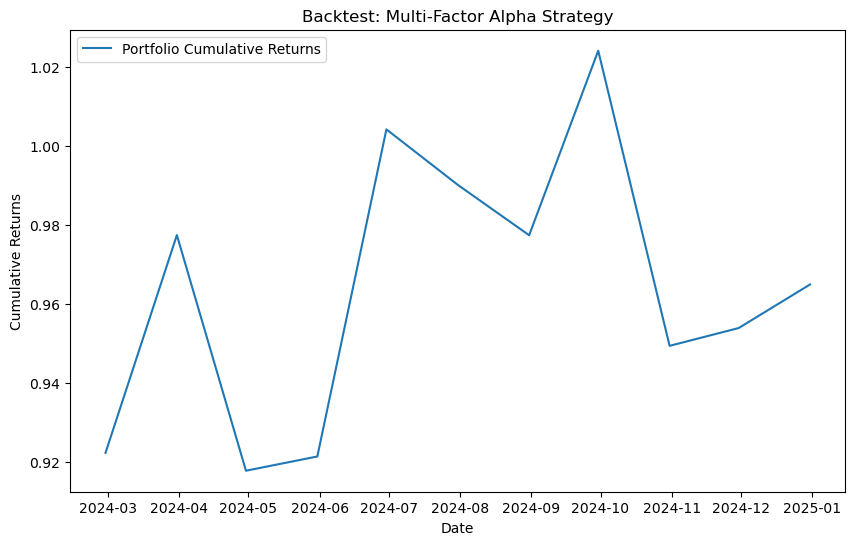

In [13]:
import yfinance as yf
import pandas as pd

# Example tickers for Nifty 50 (use your own list of stocks from the ranked DataFrame)
# Instead of using example tickers, use the top_n tickers
tickers = df.head(3).index.tolist()  # Get the top 3 tickers from the ranking

# Download historical data for the past 6 months
data = yf.download(tickers, start='2024-01-01', end='2025-01-01')

# Check if 'Adj Close' is present, otherwise use 'Close'
if 'Adj Close' in data.columns:
    data = data['Adj Close']
else:
    data = data['Close']

# Calculate monthly returns
monthly_returns = data.resample('M').ffill().pct_change()

# For simplicity, let's pick top 3 stocks from the ranking based on total score
top_n = df.head(3).index.tolist()

# Select the returns of the top N stocks
top_n_returns = monthly_returns[top_n]  # Now top_n tickers should match the columns

# Calculate portfolio returns by averaging the returns of the top N stocks
portfolio_returns = top_n_returns.mean(axis=1)

# Calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# Plot cumulative returns of the portfolio
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Portfolio Cumulative Returns')
plt.title('Backtest: Multi-Factor Alpha Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [15]:
import yfinance as yf
import pandas as pd
import numpy as np

# ... (Previous code to calculate portfolio returns) ...
tickers = df.head(3).index.tolist()  # Get the top 3 tickers from the ranking

# Download historical data for the past 6 months
data = yf.download(tickers, start='2024-01-01', end='2025-01-01')

# Check if 'Adj Close' is present, otherwise use 'Close'
if 'Adj Close' in data.columns:
    data = data['Adj Close']
else:
    data = data['Close']

# Calculate monthly returns
monthly_returns = data.resample('M').ffill().pct_change()

# For simplicity, let's pick top 3 stocks from the ranking based on total score
top_n = df.head(3).index.tolist()

# Select the returns of the top N stocks
top_n_returns = monthly_returns[top_n]  # Now top_n tickers should match the columns

# Calculate portfolio returns by averaging the returns of the top N stocks
portfolio_returns = top_n_returns.mean(axis=1)

# Calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# Assuming 'cumulative_returns' holds the strategy's cumulative returns
strategy_values = cumulative_returns.values  # Convert cumulative returns to an array

# Download historical data for NIFTY 50
# Use 'Close' instead of 'Adj Close' for NIFTY 50
nifty_data = yf.download('^NSEI', start='2024-01-01', end='2025-01-01')['Close']  
nifty_values = nifty_data.values  # Convert NIFTY data to an array

# Handle NaN values in strategy_values before calculating strategy_return
# Find the first valid (non-NaN) index
first_valid_index = np.where(np.isfinite(strategy_values))[0][0]

strategy_return = (strategy_values[-1] / strategy_values[first_valid_index]) - 1
index_return = (nifty_values[-1] / nifty_values[0]) - 1

print(f"Strategy Return: {strategy_return * 100:.2f}%")
print(f"NIFTY 50 Return: {index_return[0] * 100:.2f}%")

[*********************100%***********************]  3 of 3 completed
C:\Users\m8cg2\AppData\Local\Temp\ipykernel_16228\660517468.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = data.resample('M').ffill().pct_change()
[*********************100%***********************]  1 of 1 completed

Strategy Return: 4.62%
NIFTY 50 Return: 8.75%
